In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [45]:
df=pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [47]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [48]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [49]:
df[df.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [50]:
df.iloc[:,1:]
from sklearn.preprocessing import StandardScaler
n_normal=scale(df)
n_normal

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## PCA

In [51]:
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(n_normal)

In [52]:
principalComponents

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
        -4.20493905e-01,  5.52927766e-01, -3.02978176e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
        -1.30019629e-01,  3.94971160e-01, -1.46645308e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
        -2.79074108e-01,  1.89799314e-03,  2.12780166e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         5.02640272e-01,  6.93336340e-01,  1.67035660e-01],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.13785741e-01,  3.44119826e-01, -1.09514873e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -2.38282390e-01, -1.89866131e-01, -1.64090011e-01]])

In [56]:
PCA_dataset=pd.DataFrame(data=principalComponents,columns=['component1', 'component2', 'component3', 'component4', 
                                                                  'component5', 'component6','component7', 'component8', 'component9',
                                                                 'component10', 'component11', 'component12', 'component13'])
                                                           
PCA_dataset

,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,component11,component12,component13
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637,-0.458765,1.065570,-0.420494,0.552928,-0.302978
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372,0.218806,-0.020182,-0.130020,0.394971,-0.146645
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957,1.222769,-0.106249,-0.279074,0.001898,0.021278
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844,-0.114658,0.107671,0.773866,-0.230929,-0.501277
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937,-0.261548,0.112434,-0.537931,-0.226686,0.274109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626,-0.125419,-0.392619,0.136783,0.174807,-0.198803
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588,0.055341,-0.236267,0.254286,-0.277519,-0.185064
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545,-0.027881,-0.212749,0.502640,0.693336,0.167036
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512,0.048784,0.479793,0.313786,0.344120,-0.109515


In [57]:
var= pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458])

In [58]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.54, 57.38, 67.71, 74.34, 80.61, 85.42, 89.38, 91.88, 93.98,
       95.85, 97.46, 98.67, 99.6 ])

In [59]:
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

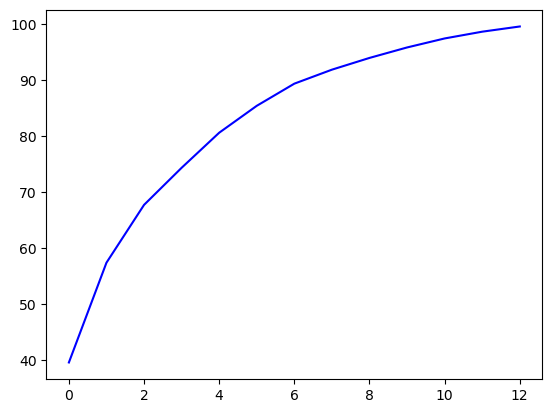

In [60]:
plt.plot(var1,color="blue")

In [61]:
principal_component1 = PCA_dataset['component1']
principal_component2 = PCA_dataset['component2']
principal_component3 = PCA_dataset['component3']

In [62]:
pca_dff = pd.concat([principal_component1, principal_component2, principal_component3], axis = 1)
pca_dff.head()

,component1,component2,component3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829


C:\Users\lilly\AppData\Local\Temp\ipykernel_10736\653098571.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(10,10)).gca(projection='3d')


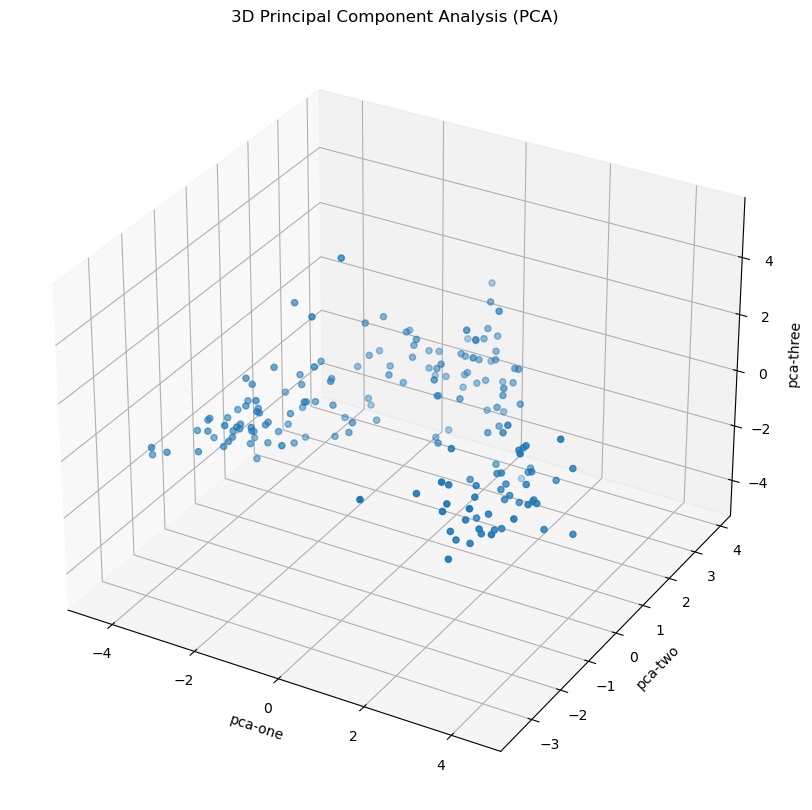

In [63]:
ax = plt.figure(figsize=(10,10)).gca(projection='3d')
plt.title('3D Principal Component Analysis (PCA)')
ax.scatter(
    xs=principal_component1, 
    ys=principal_component2, 
    zs=principal_component3, 
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pca_df_normal = scaler.fit_transform(pca_dff)
print(pca_df_normal)

[[0.10320049 0.27963866 0.44509635]
 [0.21487526 0.52098906 0.25763698]
 [0.18609695 0.33596752 0.56068165]
 [0.05830319 0.10163428 0.44407215]
 [0.3408477  0.35886423 0.665651  ]
 [0.12957845 0.18799427 0.39836047]
 [0.18996723 0.31671571 0.36328868]
 [0.23015259 0.25822799 0.47636036]
 [0.184948   0.3513648  0.28338933]
 [0.16131831 0.36854047 0.36264391]
 [0.08570297 0.29866592 0.41921538]
 [0.26197093 0.39335098 0.34171951]
 [0.22503101 0.38447976 0.37454723]
 [0.08628647 0.32200106 0.34049133]
 [0.         0.19068184 0.33458318]
 [0.20588065 0.25076521 0.48359966]
 [0.22087756 0.16082599 0.5454148 ]
 [0.24887231 0.25520856 0.54168516]
 [0.07856029 0.13409261 0.41287467]
 [0.22997903 0.33223265 0.44510478]
 [0.12413679 0.3685772  0.42505508]
 [0.33254656 0.44382365 0.55594896]
 [0.18126185 0.48807639 0.43027898]
 [0.27342073 0.54611021 0.47611112]
 [0.26140908 0.51908076 0.55126653]
 [0.34196814 0.34932966 0.84627429]
 [0.25929125 0.3833186  0.45288277]
 [0.31588651 0.48866199 0.32

In [67]:
from sklearn.cluster import AgglomerativeClustering
H_clusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(n_clusters=3)

In [68]:
y=pd.DataFrame(H_clusters.fit_predict(pca_df_normal),columns=['clustersid_H'])
y['clustersid_H'].value_counts()

0    70
2    60
1    48
Name: clustersid_H, dtype: int64

### K-Means clustering

In [69]:
from sklearn.cluster import KMeans

C:\Users\lilly\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


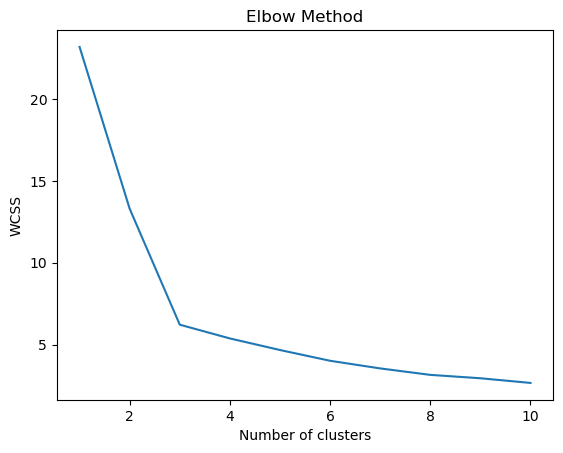

In [70]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_df_normal)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [71]:
KM_clusters = KMeans(3, random_state=42)
KM_clusters.fit(pca_df_normal)

KMeans(n_clusters=3, random_state=42)

In [72]:
y=pd.DataFrame(KM_clusters.fit_predict(pca_df_normal),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

0    67
2    62
1    49
Name: clusterid_Kmeans, dtype: int64

### preparing actual vs predicted data

In [74]:
wine_class = df['Type']
wine_class = pd.Series(wine_class)

In [75]:
clustersid_HC = H_clusters.labels_
clustersid_HC = pd.Series(clustersid_HC)

In [76]:
clusterid_Kmeans = KM_clusters.labels_
clusterid_Kmeans = pd.Series(clusterid_Kmeans)

In [77]:
pred_df = pd.concat([wine_class, clustersid_HC, clusterid_Kmeans],axis = 1)
pred_df

,Type,0,1
0,1,2,2
1,1,2,2
2,1,2,2
3,1,2,2
4,1,2,2
...,...,...,...
173,3,1,1
174,3,1,1
175,3,1,1
176,3,1,1
